# Toy Brains Documentation

> Author(s): JiHoon Kim<br>
> Date: 08 May 2023<br>
> Summary: Documentation for
> 1. How to generate the Toy Brains Dataset using `create_shapes_data`.<br>
> 2. What is Generative Variables (GVs) include some example images with different states of each Generative Variable (GV).<br>
> 3. `TBA` ~What is Confounds and Labels with some example images.~

[Toy Brains Dataset](https://github.com/RoshanRane/toybrains) can be used to generate a toy dataset of images (64 x 64 pixels) that roughly resemble 2D brain MRI slice.
The different attributes of the generated 2D images can be easily controlled and modified with any self-defined `labels` and `covariates` or confounders.  
The generated synthetic data can be used to quickly test and compare different confound-control methods analysis, or casuality analysis, and image-based prediction models such as deep learning architectures.

In this documentation,
1. You will understand how to generate the synthetic dataset using [create_shapes_data](../create_shapes_data.py) command.
2. You will discover key concept, GV (currently we have around 20 GVs) with some examples of different states of GVs in Toy Brains Dataset.
3. `TBA` ~You will find confounds, and lables in the context of covariates.~

## Setup notebook
**IPython Magic commands:** <br>
IPython provides some convinient predefined *'magic functions'* as [documented here](https://ipython.readthedocs.io/en/stable/interactive/magics.html). In a jupyter cell, we can use `%` followed by one of the magic function names. This notebook uses 3 commands: <br>
    (a) `%matplotlib inline`:  Sets the backend of matplotlib to the 'inline' backend, therefore all pyplots plots changing how the plots are displayed and stored so that they are inline with the frontend; stored within the notebook document <br>
    (b) `%load_ext autoreload` and `%autoreload 2`: Reloads modules automatically before the execution of code. This is useful if you are making changes in another python file and testing it here. Without this command you will have to restart the notebook everytime.
</font>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Import python modules

**Tips**:<br>
If you get `unknown module ...` error running the next cell, then it means you need to install that specific python modules in your python environment before you can proceed

In [10]:
# standard python packages

import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt 
from PIL import Image, ImageDraw

Add an parent directory environment path for `create_shapes_data.py`

In [5]:
parent_dir = os.path.abspath('..')
os.chdir(parent_dir)

In [14]:
from visualization import show_images

## How to generate the synthetic brain MRI

### Arguments
Synthetic brain MRI is generated with the size of 64 X 64 pixels as a default. Currently, you can adjust three arguments: `N_SAMPLES`, `DIR`, `debug` using parser for command-line option.

Each argument information showed in the table below.

|   Name    |  Parser Argument(s) | Description | Default Value | Type |
| :--------- | ---------------- | ----------- |:-----------: | ---- |
| N_SAMPLES | -n , --n_samples | Number of samples | 100 | Integer |
| DIR       | --dir            | Specify the folder which contain outputs | toybrains | String |
| debug | -d , --debug | Run the debug mode | True | Boolean |

You can check the arguments using `-h` command like below

In [19]:
! python create_toybrains.py -h

usage: create_toybrains.py [-h] [-n N_SAMPLES] [--dir DIR] [-d]

optional arguments:
  -h, --help            show this help message and exit
  -n N_SAMPLES, --n_samples N_SAMPLES
  --dir DIR
  -d, --debug


### Generate the synthetic brain MRI
To generate the synthetic Brain MRI dataset, run [create_shapes_data.py](../create_shapes_data.py) with arguments.

`CAUTION`<br>
If folder exists, it overwrites the folder. If you don't want that happens, then you should change the `DIR` name.

Belows are the example command to generate 1000 samples.

In [20]:
! python create_toybrains.py -n 1000

Generating 1000 synthetic 'toy brain' images:
100%|███████████████████████████████████████| 1000/1000 [03:38<00:00,  4.57it/s]


After running the code, you can find the ouptut in the *DIR* (default `toybrains`). It contain one csv file, and two folders: images, and label.

```
.toybrains
| -- .images
    | ... *.jpg            # Synthetic images are here
| -- .label
| -- toybrains_n100.csv    # You can find all general information in here
```

### Visualize the data

You can find the csv file named `toybrains_n*.csv` in the output `DIR`.

In [18]:
df = pd.read_csv(glob("toybrains/toybrains_n*.csv")[0]).set_index('subjectID')

# sort dataframe cols by column name

df = df.reindex(sorted(df.columns), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cov_age                 100 non-null    float64
 1   cov_sex                 100 non-null    object 
 2   cov_site                100 non-null    object 
 3   gen_border_int          100 non-null    object 
 4   gen_brain_int           100 non-null    float64
 5   gen_brain_thick         100 non-null    float64
 6   gen_brain_vol-radmajor  100 non-null    float64
 7   gen_brain_vol-radminor  100 non-null    float64
 8   gen_shape-botl_curv     100 non-null    float64
 9   gen_shape-botl_int      100 non-null    object 
 10  gen_shape-botl_vol-rad  100 non-null    float64
 11  gen_shape-botr_curv     100 non-null    float64
 12  gen_shape-botr_int      100 non-null    object 
 13  gen_shape-botr_vol-rad  100 non-null    float64
 14  gen_shape-midl_curv     100 non-null    flo

You can check the images in the `images` folder in `DIR`. In defuault, it saved as *.jpg with 64 X 64 pixels  resolution.

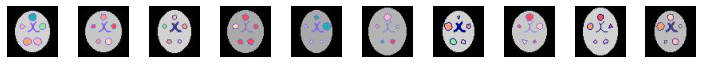

In [16]:
img_files = sorted(glob("toybrains/images/*.jpg"))

show_images(img_files=img_files, n_rows=1)

## Comphresion of Generative Variables (GVs) in Toy Brains Dataset

### Generative Variables (GVs)

In this section, we introduce *<b>Generative Variables (GVs)</b>* of Toy Brains Dataset. It starts with motivation, next definition, and types of GVs.

#### Motivation
TBA by @Roshan : `motivation of Generative variables`

#### Definition
TBA by @Roshan : `definition of Generative variables`

### Distribution of generative variables

#### Table
Currently we have 20 GVs. 

1. 'brain_vol' # total volume of the brain ranging between 1633 to 2261 [(S/2-12)*(S/2-6) to (S/2-8)*(S/2-2)]
2. 'brain_thick' # the thickness of the blue border around the brain ranging between 1 to 4
3. 'brain_int', # the intensity or brightness of the brain region ranging between 'greyness0' to 'greyness4'

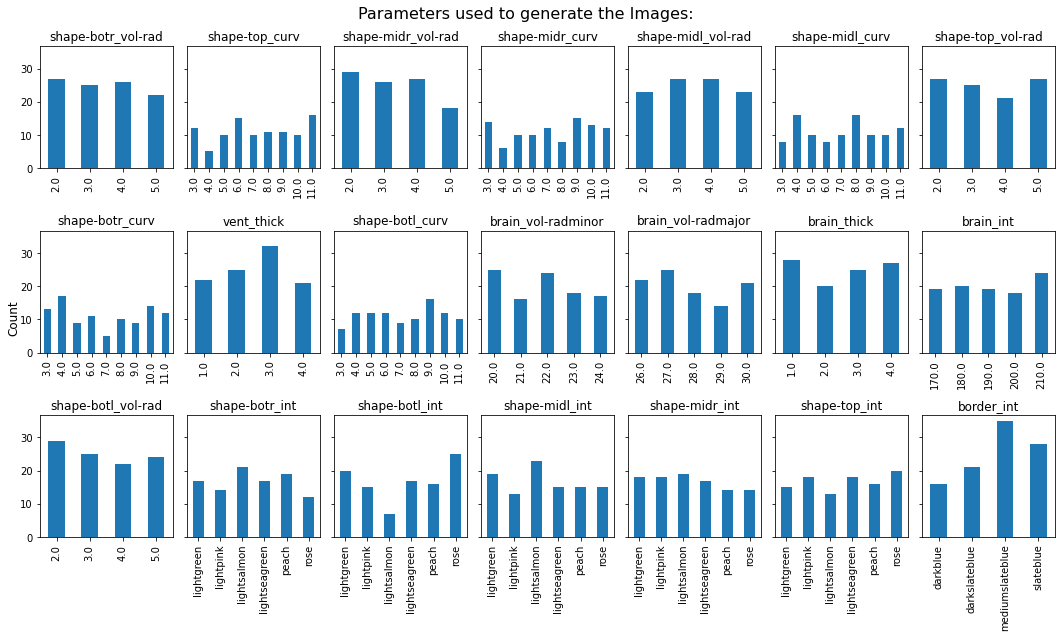

In [11]:
# sort dataframe cols by dtypes
cols = df.filter(like='gen_').dtypes.sort_values().index

f,axes = plt.subplots(len(cols)//7, 7, figsize=(15,3*len(cols)//7), 
                      sharey=True)
axes = axes.ravel()
f.suptitle("Parameters used to generate the Images:", fontsize=16)
f.supylabel("Count")

for i,col in enumerate(cols):
    ax = axes[i]
    df[col].value_counts().sort_index().plot.bar(ax=ax, 
            title=col.replace('gen_',''))
    
plt.tight_layout()
plt.show()

### Image Examples

Below plots show example images of different states of each generative variable (GV) from the dataset. 

(TODO) generate the example iamges of GV

(TODO) `Update README.md , Table of GVs with images as Super index`

<div class="alert alert-block alert-success">
The content below is currently being written, so please do not refer to it.
</div>

## Comphresion of Covariates in Toy Brains Dataset

`TBA` (TODO) The section refactoring may needed

### Confounds
1. `age ~ brain_vol & vent_thick` such that `up(age) -> up(vent_thick)` `up(age) -> down(brain_vol)`
2. `sex ~ brain_vol` as a intermediary causal variable such that `male ~ large(brain vol)` `female ~ small(brain vol)`
3. `site ~ outline_color & brain_int` such that 
4. Find citations for (2) and (3)
5. add lesions? 
6. ~add a shape {triangle, square, pentagon, hexagon, ..} at top bottom right and left~

### Labels
1. purely based on 4 shapes (combinations that are linear and non-linear)
2. partially based on confounder + partially shapes : see the idea from MDN
3. purely based on confounder pathway
4. Create a brain_mask and save it as a label

LOGO
----
`TBA` (TODO) Generating Logo of Toy Brains Dataset

(40.0, 40.0, 100.0, 100.0) (100.0, 40.0, 160.0, 100.0)


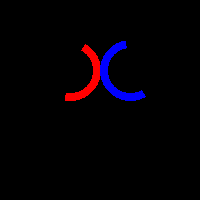

In [17]:
S=200
# Create a new image with a black background
img = Image.new("RGB", (S, S), color="black")

# Draw two arcs at the center of the image, facing opposite to each other and touching at the center
draw = ImageDraw.Draw(img)
x_off, y_off= 0,0
xy_r = (S*.2, S*.2, S*.5, S*.5)
xy_l = (S*.5, S*.2, S*.8, S*.5)
print(xy_r, xy_l)
draw.arc(xy_r, start=300, end=100,   fill="red",  width=8)
draw.arc(xy_l, start=-300, end=-100, fill="blue", width=8)

# Show the image
img